In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [3]:
app_train.DAYS_EMPLOYED.dtypes

dtype('int64')

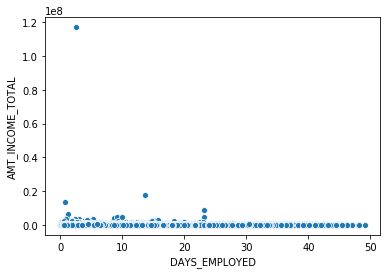

[[1.         0.01300472]
 [0.01300472 1.        ]]


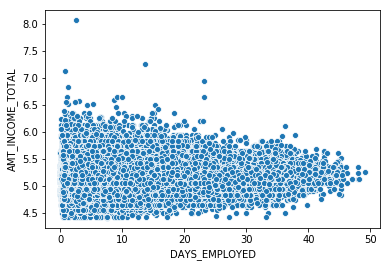

[[1.         0.03803312]
 [0.03803312 1.        ]]


In [4]:
app_train = app_train[app_train['DAYS_EMPLOYED'] != 365243]
# 如果直接畫scatter，看不出任何趨勢或形態
sns.scatterplot(x = app_train.DAYS_EMPLOYED/(-365), y = app_train.AMT_INCOME_TOTAL)
plt.show()
print(np.corrcoef(app_train.DAYS_EMPLOYED / (-365), app_train.AMT_INCOME_TOTAL))

sns.scatterplot(x = app_train.DAYS_EMPLOYED/(-365), y = np.log10(app_train.AMT_INCOME_TOTAL))
plt.show()
print(np.corrcoef(app_train.DAYS_EMPLOYED / (-365), np.log10(app_train.AMT_INCOME_TOTAL)))

In [28]:
print(app_train.dtypes.value_counts())
print(app_test.dtypes.value_counts())

float64    65
int64      41
object     16
dtype: int64
float64    65
int64      40
object     16
dtype: int64


In [32]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for i in app_train:
    if app_train[i].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[i].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[i])
            # Transform both training and testing data
            app_train[i] = le.transform(app_train[i])
            app_test[i] = le.transform(app_test[i])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [37]:
corr = app_train.corr()['TARGET']
corr

SK_ID_CURR                                 -0.001408
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.036225
FLAG_OWN_CAR                               -0.031892
FLAG_OWN_REALTY                            -0.002737
CNT_CHILDREN                                0.007741
AMT_INCOME_TOTAL                           -0.007332
AMT_CREDIT                                 -0.040659
AMT_ANNUITY                                -0.020040
AMT_GOODS_PRICE                            -0.050342
REGION_POPULATION_RELATIVE                 -0.040640
DAYS_BIRTH                                 -0.065756
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.036087
DAYS_ID_PUBLISH                             0.039910
OWN_CAR_AGE                                 0.039025
FLAG_MOBIL                                  0.000613
FLAG_EMP_PHONE                              0.000080
FLAG_WORK_PHONE                             0.

In [38]:
corr2=pd.DataFrame(corr)
corr2=corr2.sort_values(by='TARGET',ascending=False)
corr2.head(15)

,TARGET
TARGET,1.000000
DAYS_EMPLOYED,0.074958
REGION_RATING_CLIENT_W_CITY,0.067458
REGION_RATING_CLIENT,0.065113
NAME_EDUCATION_TYPE_Secondary / secondary special,0.060637
DAYS_LAST_PHONE_CHANGE,0.060288
CODE_GENDER_M,0.049210
REG_CITY_NOT_WORK_CITY,0.043384
NAME_INCOME_TYPE_Working,0.043052
REG_CITY_NOT_LIVE_CITY,0.041977


In [39]:
corr2.tail(15)

,TARGET
REGION_POPULATION_RELATIVE,-0.040640
AMT_CREDIT,-0.040659
HOUSETYPE_MODE_block of flats,-0.043757
EMERGENCYSTATE_MODE_No,-0.045394
FLOORSMAX_MODE,-0.048554
FLOORSMAX_MEDI,-0.049159
CODE_GENDER_F,-0.049199
FLOORSMAX_AVG,-0.049468
AMT_GOODS_PRICE,-0.050342
DAYS_BIRTH,-0.065756


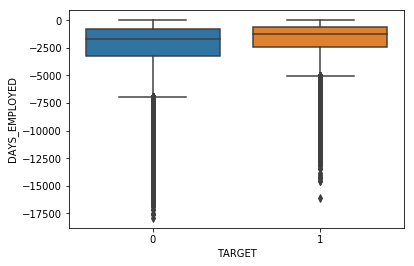

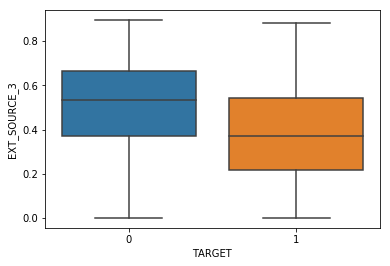

In [42]:
# 因為目標變數Target是2分類的欄位資料，在此直接選擇boxplot
sns.boxplot(x = 'TARGET', y = 'DAYS_EMPLOYED', data = app_train)
plt.show()
sns.boxplot(x = 'TARGET', y = 'EXT_SOURCE_3', data = app_train)
plt.show()